In [7]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit
import numpy as np

matplotlib.rcParams['path.simplify'] = False

# Co-occurrence Net

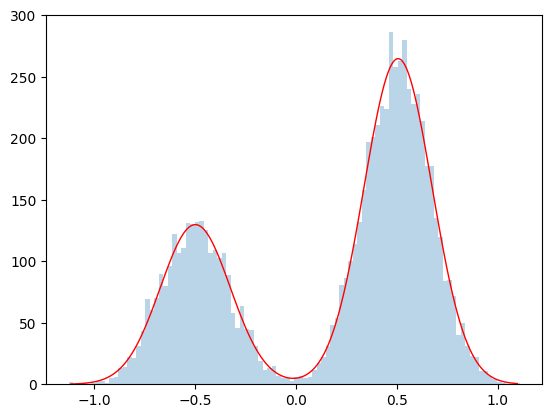

In [8]:
mu, sigma = 0.5, 0.17
mu2, sigma2 = -0.5, 0.17
#data generation
np.random.seed(123)
data=np.concatenate((np.random.normal(mu, sigma, 5000), np.random.normal(mu2, sigma2, 2500)))
y,x,_=plt.hist(data, 100, alpha=.3, label='data')
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

#x, y inputs can be lists or 1D numpy arrays

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected = (mu, sigma, 250, mu2, sigma2, 125)
params, cov = curve_fit(bimodal, x, y, expected)
sigma=np.sqrt(np.diag(cov))
x_fit = np.linspace(x.min(), x.max(), 500)
#plot combined...
plt.plot(x_fit, bimodal(x_fit, *params), color='red', lw=1, label='model')
plt.savefig("4-bimodal.pdf", format="pdf", bbox_inches="tight")
plt.show() 

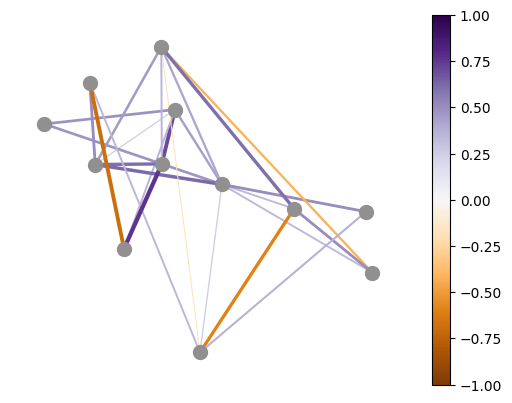

In [77]:
G = nx.erdos_renyi_graph(12, 0.35)
for e in G.edges():
    weight = 0
    # ensure we only give weights between -1 and 1 that are non zero
    while not (-1 <= weight <= 1) or weight == 0:
        weight = np.random.choice(data)
    G[e[0]][e[1]]['weight']  = weight

fig = plt.figure()
ax = fig.add_subplot()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nw_weights = tuple(x+1 for x in weights)
widths = tuple(abs(4*x) for x in weights)
pos = nx.spring_layout(G, k=1)
d = dict(G.degree)
nx.draw_networkx_nodes(G, pos, node_color='#918F8F', node_size=100, ax=ax)
#nx.draw_networkx_labels(G, pos, font_size=10, font_color='k')
edge_collection = nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=plt.cm.PuOr, width=widths, edge_vmin=-1, edge_vmax=1, ax=ax)
plt.colorbar(edge_collection)
plt.box(False)
plt.savefig("4-co-occ-net.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [19]:
json.dumps(nx.node_link_data(G))

'{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"id": 0}, {"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}, {"id": 9}, {"id": 10}, {"id": 11}], "links": [{"weight": -0.2183337421259547, "source": 0, "target": 1}, {"weight": -0.49126280507745607, "source": 0, "target": 3}, {"weight": 0.46122648902262026, "source": 0, "target": 5}, {"weight": 0.6504106026697125, "source": 0, "target": 7}, {"weight": 0.31191439598587567, "source": 0, "target": 8}, {"weight": -0.21278552951051022, "source": 0, "target": 10}, {"weight": 0.682816631888224, "source": 1, "target": 2}, {"weight": 0.7635354751118769, "source": 1, "target": 4}, {"weight": 0.36060526428664974, "source": 1, "target": 10}, {"weight": -0.40475817804268077, "source": 2, "target": 3}, {"weight": 0.7185505928103799, "source": 2, "target": 4}, {"weight": 0.3339817800217799, "source": 2, "target": 7}, {"weight": -0.5573930070098837, "source": 2, "target": 10}, {"weight": 0.6172158489

In [248]:
G = nx.node_link_graph(json.loads('{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"id": 0}, {"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}, {"id": 9}, {"id": 10}, {"id": 11}], "links": [{"weight": 0.5826312884833548, "source": 0, "target": 2}, {"weight": 0.6148356427539814, "source": 0, "target": 3}, {"weight": 0.7306576990838498, "source": 0, "target": 5}, {"weight": 0.9003900420385831, "source": 0, "target": 9}, {"weight": -0.638579754693958, "source": 0, "target": 11}, {"weight": -0.27796656418881527, "source": 1, "target": 3}, {"weight": 0.46123412849139406, "source": 1, "target": 4}, {"weight": 0.6068144174853789, "source": 1, "target": 6}, {"weight": 0.5112680070896285, "source": 1, "target": 7}, {"weight": 0.42525572507758125, "source": 1, "target": 10}, {"weight": 0.4601658168250095, "source": 1, "target": 11}, {"weight": 0.4943223393958548, "source": 2, "target": 5}, {"weight": -0.14671525430854027, "source": 2, "target": 6}, {"weight": -0.4038872117981791, "source": 2, "target": 7}, {"weight": 0.5176903249517476, "source": 2, "target": 9}, {"weight": 0.7534244447856359, "source": 3, "target": 4}, {"weight": 0.5244768288592718, "source": 3, "target": 7}, {"weight": 0.7363358287149884, "source": 3, "target": 8}, {"weight": 0.631262017598583, "source": 3, "target": 9}, {"weight": 0.13566419265027413, "source": 4, "target": 5}, {"weight": 0.7444351489453024, "source": 4, "target": 7}, {"weight": -0.4320948133020824, "source": 4, "target": 8}, {"weight": -0.581091373256546, "source": 4, "target": 10}, {"weight": 0.32431559110760866, "source": 4, "target": 11}, {"weight": -0.8711066258559395, "source": 5, "target": 6}, {"weight": 0.41156905052366743, "source": 5, "target": 7}, {"weight": 0.5099768645364847, "source": 5, "target": 8}, {"weight": 0.4833008102788417, "source": 5, "target": 9}, {"weight": 0.5195853232070693, "source": 5, "target": 11}, {"weight": 0.13289492016299193, "source": 6, "target": 7}, {"weight": 0.3292758342014238, "source": 6, "target": 9}, {"weight": 0.2234641095013591, "source": 6, "target": 10}, {"weight": 0.4832578406676551, "source": 7, "target": 10}, {"weight": 0.4634528823561386, "source": 7, "target": 11}, {"weight": 0.5923304281865012, "source": 8, "target": 10}]}'))

# Trophic Net

In [110]:
G = nx.DiGraph()

G.add_nodes_from(
    [
        (0, {"organism": "bacteria"}),
        (1, {"organism": "fungi"}),
        (2, {"organism": "mycorrhizae"}),
        (3, {"organism": "amoebae"}),
        (4, {"organism": "flagellates"}),
        (5, {"organism": "root-feeding nematodes"}),
        (6, {"organism": "bacterivorous nematodes"}),
        (7, {"organism": "fungivorous nematodes"}),
        (8, {"organism": "omnivorous nematodes"}),
        (9, {"organism": "fungivorous mites"}),
        (10, {"organism": "omnivorous mites"}),
        (11, {"organism": "collembolans"}),
        #(12, {"organism": "som"}),
    ]
)
G.add_edge(0, 6, weight=-0.5)
G.add_edge(0, 4, weight=-0.5)
G.add_edge(0, 8, weight=-0.5)
G.add_edge(0, 3, weight=-0.5)

G.add_edge(1, 7, weight=-0.5)
G.add_edge(1, 9, weight=-0.5)
G.add_edge(1, 11, weight=-0.5)

G.add_edge(2, 7, weight=-0.5)
G.add_edge(2, 9, weight=-0.5)
G.add_edge(2, 11, weight=-0.5)

G.add_edge(3, 8, weight=-0.5)

G.add_edge(4, 8, weight=-0.5)
G.add_edge(4, 3, weight=-0.5)

G.add_edge(5, 8, weight=-0.5)
G.add_edge(5, 10, weight=-0.5)

G.add_edge(6, 8, weight=-0.5)
G.add_edge(6, 10, weight=-0.5)

G.add_edge(7, 8, weight=-0.5)
G.add_edge(7, 10, weight=-0.5)

#G.add_edge(8, 8, weight=-0.5)
G.add_edge(8, 10, weight=-0.5)

G.add_edge(9, 10, weight=-0.5)

G.add_edge(11, 10, weight=-0.5)

#G.add_edge(12, 0, weight=-0.5)
#G.add_edge(12, 1, weight=-0.5)
#G.add_edge(12, 2, weight=-0.5)
#G.add_edge(12, 5, weight=-0.5)

json.dumps(nx.node_link_data(G))

'{"directed": true, "multigraph": false, "graph": {}, "nodes": [{"organism": "bacteria", "id": 0}, {"organism": "fungi", "id": 1}, {"organism": "mycorrhizae", "id": 2}, {"organism": "amoebae", "id": 3}, {"organism": "flagellates", "id": 4}, {"organism": "root-feeding nematodes", "id": 5}, {"organism": "bacterivorous nematodes", "id": 6}, {"organism": "fungivorous nematodes", "id": 7}, {"organism": "omnivorous nematodes", "id": 8}, {"organism": "fungivorous mites", "id": 9}, {"organism": "omnivorous mites", "id": 10}, {"organism": "collembolans", "id": 11}], "links": [{"weight": -0.5, "source": 0, "target": 6}, {"weight": -0.5, "source": 0, "target": 4}, {"weight": -0.5, "source": 0, "target": 8}, {"weight": -0.5, "source": 0, "target": 3}, {"weight": -0.5, "source": 1, "target": 7}, {"weight": -0.5, "source": 1, "target": 9}, {"weight": -0.5, "source": 1, "target": 11}, {"weight": -0.5, "source": 2, "target": 7}, {"weight": -0.5, "source": 2, "target": 9}, {"weight": -0.5, "source": 2,

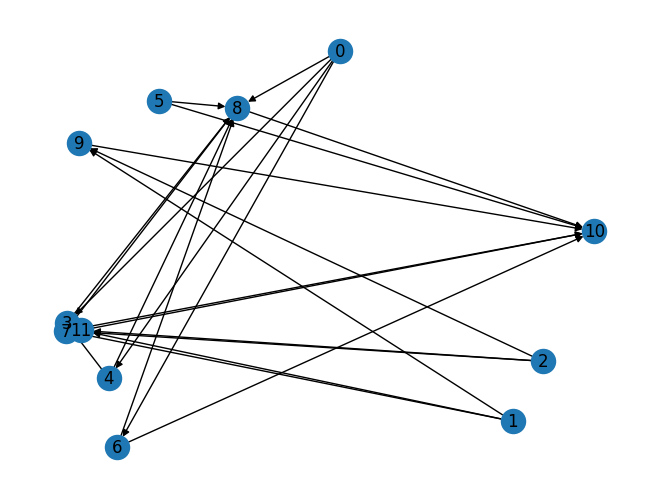

In [111]:
options = {
    "node_color": "black",
    "node_size": 100,
    "width": 3,
}
nx.draw(G, with_labels=True)